In [2]:
import pandas as pd
from darts import TimeSeries

In [3]:
from darts.models import AutoARIMA

/Users/IRIS/.pyenv/versions/3.10.6/envs/assist_trader/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
from pandas import Series
from pandas.tseries.offsets import DateOffset
import numpy as np
import scipy
from scipy import stats
import scipy.stats as scs
import itertools
from scipy.special import boxcox, inv_boxcox

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import tsaplots
import pmdarima as pm

In [6]:
from datetime import datetime, timedelta, date

In [7]:
import prophet
from prophet import Prophet

In [8]:
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


import pandas as pd
from pandas import Series
from pandas.tseries.offsets import DateOffset
import numpy as np
import scipy
from scipy import stats
import scipy.stats as scs
import itertools
from scipy.special import boxcox, inv_boxcox


import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Data Source
import yfinance as yf

# Stats models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import tsaplots
import pmdarima as pm

# Date tools
from datetime import datetime, timedelta, date

# Prophet model
import prophet
from prophet import Prophet

# Imports for model metrics and performance
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error
import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import MinMaxScaler

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
import re

In [11]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
plt.rcParams["figure.figsize"] = (14,6)
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [260]:
data_path = ("../raw_data/data_daily.csv")
data = pd.read_csv(data_path)
data["timestamp"] = pd.to_datetime(data['timestamp'])

data.drop_duplicates(subset='timestamp', inplace=True)

data.head()

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-09-12,10099.78,10184.66,10081.81,10161.51,621.690,0.008019,9381.841629,54.999476,10062.211552,-8.198794,-0.116362,-0.288550,16.431891,9.311687,1.452269,57.987654,1.000000,90.760327,83.238267,-5.246409,52.701871,-9.239673,80.236309,1.0,0.0,1.607514,1.558032,1.168745,2.489067,0.729341,13.991682,17.547411,26.026556,76.0,24.0,100.0,181.949135,37.5275,0,-9.504205,4.577703,-14.081908,-11.741233,-29.133452,25.679280,1,98.265595,-0.046155,0.183679,0.900498,1.084177,3009.57,2.25,1.7,1,1.05901,0.58994,1,55.107287,-1
1,2019-09-13,10321.45,10400.00,10321.45,10388.87,655.809,0.095988,11734.867436,77.615349,10259.840800,159.304471,0.608617,0.468596,4.272041,5.684204,2.640083,70.369326,0.868380,96.554713,88.218528,28.186883,53.604233,-3.445287,67.796245,0.0,0.0,4.120070,1.230895,1.938013,2.230950,0.321799,27.225902,11.870076,32.964564,40.0,60.0,100.0,112.401856,-56.9245,1,19.737246,6.358419,13.378827,62.202615,47.771729,24.292162,1,99.984201,0.069384,0.575479,0.686524,1.262003,3007.39,2.25,1.7,-1,2.53919,2.24085,1,42.784133,1
2,2019-09-14,10254.01,10299.66,10231.31,10287.11,681.268,0.033290,979.983540,41.709476,10275.093802,-76.575235,-0.047843,0.044734,2.761658,5.839311,-0.187456,51.924402,0.776736,70.134915,45.981215,-2.620863,58.261506,-29.865085,61.373709,0.0,0.0,1.566792,1.102287,0.477146,1.854662,0.945806,22.265541,20.256346,18.970713,92.0,-80.0,12.0,-37.651195,-17.6625,1,0.444923,-4.194756,4.639679,-4.915877,4.601034,24.405506,1,0.000381,0.007842,-0.039844,0.995906,0.956061,3007.39,2.25,1.7,1,-1.52562,-1.92668,1,56.123524,-1
3,2019-09-15,10395.04,10419.97,10317.39,10377.71,1011.804,0.090962,4476.915550,46.417427,10338.125632,69.057147,0.244907,0.178765,3.620128,4.110448,0.700987,60.161971,0.765572,78.569980,85.801171,18.337634,61.533868,-21.430020,52.754102,0.0,0.0,1.552809,0.903583,1.091146,1.904409,0.272558,17.831905,18.380853,21.759678,64.0,32.0,96.0,98.433260,-17.6275,1,5.356089,3.119255,2.236834,25.294393,18.444913,24.432979,1,99.857559,0.023631,0.171927,0.875705,1.047632,3007.39,2.25,1.7,-1,2.34801,2.39448,1,49.875268,1
4,2019-09-16,10271.19,10304.56,10266.13,10289.03,834.126,0.021198,-752.692873,34.979972,10292.117754,-19.298147,-0.082579,-0.067507,0.362793,1.060619,0.033737,46.724133,0.654263,45.748786,39.910370,-7.941591,50.045302,-54.251214,43.731726,0.0,0.0,0.578982,0.689130,0.380905,0.780561,0.519789,39.609535,26.743730,11.020501,96.0,-92.0,4.0,-74.176329,11.9175,1,-3.065092,-0.524449,-2.540643,-8.507406,-6.956787,24.071955,1,0.000021,-0.010739,-0.071409,1.018981,0.947572,2997.96,2.25,1.7,-1,0.00179,0.18466,1,70.808813,-1


In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1361
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   1362 non-null   datetime64[ns]
 1   open                        1362 non-null   float64       
 2   high                        1362 non-null   float64       
 3   low                         1362 non-null   float64       
 4   close                       1362 non-null   float64       
 5   volume                      1362 non-null   float64       
 6   volume_CMF                  1362 non-null   float64       
 7   volume_FII                  1362 non-null   float64       
 8   volume_MFI                  1362 non-null   float64       
 9   volume_VWA                  1362 non-null   float64       
 10  mom_AOI                     1362 non-null   float64       
 11  mom_PPO                     1362 non-null   float64     

In [262]:
data.isnull().sum().sum()

0

In [263]:
#data=data.dropna()

In [264]:
data.duplicated().sum()

0

In [265]:
#data = data.drop_duplicates()

In [266]:
#had to remove duplicates
#series = TimeSeries.from_dataframe(data,"timestamp", "close", freq='H')

# TRAIN SPLIT

In [267]:
train_size = 0.7
index = round(train_size*data.shape[0])

data_train = data.iloc[:index]
data_test = data.iloc[index:]

In [268]:
data_train.shape

(953, 61)

In [269]:
data_test.shape

(409, 61)

In [270]:
y_train=data_train[['timestamp', 'close']]
X_train=data_train.drop(columns=['timestamp', 'close'])
X_train

,open,high,low,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,10099.78,10184.66,10081.81,621.690,0.008019,9.381842e+03,54.999476,10062.211552,-8.198794,-0.116362,-0.288550,16.431891,9.311687,1.452269,57.987654,1.000000,90.760327,83.238267,-5.246409,52.701871,-9.239673,80.236309,1.0,0.0,1.607514,1.558032,1.168745,2.489067,0.729341,13.991682,17.547411,26.026556,76.0,24.0,100.0,181.949135,37.5275,0,-9.504205,4.577703,-14.081908,-11.741233,-29.133452,25.679280,1,98.265595,-0.046155,0.183679,0.900498,1.084177,3009.57,2.25,1.7,1,1.05901,0.58994,1,55.107287,-1
1,10321.45,10400.00,10321.45,655.809,0.095988,1.173487e+04,77.615349,10259.840800,159.304471,0.608617,0.468596,4.272041,5.684204,2.640083,70.369326,0.868380,96.554713,88.218528,28.186883,53.604233,-3.445287,67.796245,0.0,0.0,4.120070,1.230895,1.938013,2.230950,0.321799,27.225902,11.870076,32.964564,40.0,60.0,100.0,112.401856,-56.9245,1,19.737246,6.358419,13.378827,62.202615,47.771729,24.292162,1,99.984201,0.069384,0.575479,0.686524,1.262003,3007.39,2.25,1.7,-1,2.53919,2.24085,1,42.784133,1
2,10254.01,10299.66,10231.31,681.268,0.033290,9.799835e+02,41.709476,10275.093802,-76.575235,-0.047843,0.044734,2.761658,5.839311,-0.187456,51.924402,0.776736,70.134915,45.981215,-2.620863,58.261506,-29.865085,61.373709,0.0,0.0,1.566792,1.102287,0.477146,1.854662,0.945806,22.265541,20.256346,18.970713,92.0,-80.0,12.0,-37.651195,-17.6625,1,0.444923,-4.194756,4.639679,-4.915877,4.601034,24.405506,1,0.000381,0.007842,-0.039844,0.995906,0.956061,3007.39,2.25,1.7,1,-1.52562,-1.92668,1,56.123524,-1
3,10395.04,10419.97,10317.39,1011.804,0.090962,4.476916e+03,46.417427,10338.125632,69.057147,0.244907,0.178765,3.620128,4.110448,0.700987,60.161971,0.765572,78.569980,85.801171,18.337634,61.533868,-21.430020,52.754102,0.0,0.0,1.552809,0.903583,1.091146,1.904409,0.272558,17.831905,18.380853,21.759678,64.0,32.0,96.0,98.433260,-17.6275,1,5.356089,3.119255,2.236834,25.294393,18.444913,24.432979,1,99.857559,0.023631,0.171927,0.875705,1.047632,3007.39,2.25,1.7,-1,2.34801,2.39448,1,49.875268,1
4,10271.19,10304.56,10266.13,834.126,0.021198,-7.526929e+02,34.979972,10292.117754,-19.298147,-0.082579,-0.067507,0.362793,1.060619,0.033737,46.724133,0.654263,45.748786,39.910370,-7.941591,50.045302,-54.251214,43.731726,0.0,0.0,0.578982,0.689130,0.380905,0.780561,0.519789,39.609535,26.743730,11.020501,96.0,-92.0,4.0,-74.176329,11.9175,1,-3.065092,-0.524449,-2.540643,-8.507406,-6.956787,24.071955,1,0.000021,-0.010739,-0.071409,1.018981,0.947572,2997.96,2.25,1.7,-1,0.00179,0.18466,1,70.808813,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,40261.00,40608.20,40261.00,7171.256,-0.090119,-3.126237e+05,42.436406,40274.286128,-123.541765,-0.059881,-0.048919,-5.165055,-6.062375,0.376302,56.161266,1.000000,78.426052,56.089141,-4.201031,46.351777,-21.573948,202.241675,0.0,0.0,1.323184,0.853457,0.840981,1.646843,0.625364,23.220710,16.584916,25.453665,76.0,-56.0,20.0,62.017237,57.1350,0,-0.851352,-3.203098,2.351745,-24.144652,-19.714933,23.188511,1,5.258437,-0.004831,0.030116,0.937317,0.967433,4392.59,0.50,8.3,1,-0.35452,-0.92585,1,53.650014,-1
949,40246.00,40270.10,40100.00,5936.654,-0.016431,-1.033016e+05,32.307768,40258.879921,-128.681471,-0.071900,-0.038185,12.5

In [271]:
y_train

,timestamp,close
0,2019-09-12,10161.51
1,2019-09-13,10388.87
2,2019-09-14,10287.11
3,2019-09-15,10377.71
4,2019-09-16,10289.03
...,...,...
948,2022-04-17,40465.10
949,2022-04-18,40189.00
950,2022-04-19,40790.60
951,2022-04-20,41299.90


In [272]:
y_test=data_test[['timestamp', 'close']]
X_test=data_test.drop(columns=['timestamp', 'close'])
X_test

,open,high,low,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
953,40594.7,40839.3,40549.2,12167.369,-0.330904,-3.587002e+06,41.030991,41911.215432,-419.953235,-0.291381,0.165401,15.766140,17.812111,-2.571737,33.516898,0.063817,8.124593,4.005836,-8.917079,23.453760,-91.875407,377.926600,0.0,0.0,5.284811,1.784852,-0.956914,5.894004,2.357322,24.971190,35.349030,17.049211,96.0,-28.0,68.0,-174.123299,469.770,0,6.391270,-6.777091,13.168361,-121.214538,69.235602,25.442138,0,4.460017e+00,0.028900,-0.334151,1.186096,0.851945,4271.78,0.50,8.30,-1,-1.93248,-1.43661,-1,33.254476,-1
954,39602.2,39679.0,39508.9,5292.966,-0.157392,-1.671225e+06,29.358572,39858.591860,-1157.552647,-1.060483,-1.000693,-4.012775,3.295162,-1.738899,32.572367,0.534595,27.695144,25.742109,-39.245852,41.840956,-72.304856,367.450776,0.0,0.0,4.965034,1.701801,-0.270965,3.776913,2.292300,46.336814,28.677756,10.826526,84.0,-80.0,4.0,-77.440410,347.255,0,-34.554709,-4.079482,-30.475227,-426.353916,-404.387285,24.891190,0,2.658377e-07,-0.147317,-0.344313,1.204632,0.860319,4271.78,0.50,8.30,1,-1.81086,-2.07617,-1,45.529448,-1
955,39769.2,39937.3,39749.8,4606.885,0.072067,9.161256e+04,75.773307,39704.760841,90.520882,-0.092564,-0.237027,-26.340490,-25.282318,0.930467,54.910848,1.000000,74.321267,60.256410,-7.034194,52.377716,-25.678733,201.007367,0.0,0.0,1.188081,0.825856,1.190825,1.242498,0.198064,27.126403,15.027256,20.786437,28.0,72.0,100.0,141.702069,-68.440,0,-3.728596,4.756038,-8.484634,-36.806945,-94.343996,21.505531,1,9.999968e+01,-0.033744,0.232515,0.865494,1.098009,4271.78,0.50,8.30,-1,1.01627,0.86460,1,55.434098,1
956,39479.1,39625.0,39427.0,4347.161,0.193972,-2.304059e+05,35.338315,39527.816136,-114.243235,-0.093594,-0.094255,9.163792,13.484661,-0.314623,49.053801,0.749291,68.896321,67.138079,-5.815945,58.328644,-31.103679,262.789653,0.0,0.0,0.986787,1.262238,0.493769,2.644321,0.470424,20.833524,28.109082,16.159514,84.0,-80.0,4.0,-40.119416,48.050,0,-1.081116,-0.727218,-0.353898,-37.087716,-37.368286,26.965553,0,7.485588e+01,-0.010378,-0.104889,1.039386,0.934497,4296.12,0.50,8.30,1,0.18519,0.06277,1,50.892815,-1
957,40166.3,40242.5,40045.8,4980.391,-0.052870,3.686602e+06,98.265002,39206.100149,670.366471,0.498793,0.000530,8.414324,19.336632,4.273713,68.116637,0.991383,92.081081,91.366503,15.421560,51.822423,-7.918919,440.479638,0.0,0.0,5.918913,2.295343,1.712997,4.523580,1.575542,30.393627,12.321333,23.780547,48.0,52.0,100.0,158.092346,-715.950,1,-0.731150,13.482688,-14.213838,196.330521,0.613581,27.119760,1,9.979927e+01,-0.008916,0.499482,0.775172,1.274654,4175.20,0.50,8.30,1,3.29950,3.02078,1,43.755775,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,27745.7,27832.7,27637.4,10281.328,-0.115085,-2.558443e+05,37.428422,27785.137663,-4.049412,0.001926,0.034655,-5.320770,1.433885,-0.466595,47.666722,0.236410,35.410932,46.021759,0.078157,52.449216,-64.589068,154.142202,0.0,0.0,1.255117,1.083264,0.274102,1.748186,0.845608,12.254840,20.165743,15.941349,72.0,-12.0,60.0,-53.584863,113.210,1,-1.624776,-0.828185,-0.796592,0.534585,9.619334,25.037448,0,8.134563e-01,0.002611,-0.035737,1.002756,0.967019,4179.83,5.25,5.15,1,-0.40399,-0.58092,1,58.137761,-1
1358,27096.9,27108.8,27030.3,5248.193,-0.065417,-4.685

In [273]:
y_test

,timestamp,close
953,2022-04-22,40706.6
954,2022-04-23,39583.6
955,2022-04-24,39863.8
956,2022-04-25,39605.1
957,2022-04-26,40214.2
...,...,...
1357,2023-05-31,27710.1
1358,2023-06-01,27081.9
1359,2023-06-02,26881.4
1360,2023-06-03,27190.0


# ETS(baseline)

In [274]:
from darts.models import ExponentialSmoothing

In [275]:
data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-09-12,10099.78,10184.66,10081.81,10161.51,621.690,0.008019,9381.841629,54.999476,10062.211552,-8.198794,-0.116362,-0.288550,16.431891,9.311687,1.452269,57.987654,1.000000,90.760327,83.238267,-5.246409,52.701871,-9.239673,80.236309,1.0,0.0,1.607514,1.558032,1.168745,2.489067,0.729341,13.991682,17.547411,26.026556,76.0,24.0,100.0,181.949135,37.5275,0,-9.504205,4.577703,-14.081908,-11.741233,-29.133452,25.679280,1,98.265595,-0.046155,0.183679,0.900498,1.084177,3009.57,2.25,1.70,1,1.05901,0.58994,1,55.107287,-1
1,2019-09-13,10321.45,10400.00,10321.45,10388.87,655.809,0.095988,11734.867436,77.615349,10259.840800,159.304471,0.608617,0.468596,4.272041,5.684204,2.640083,70.369326,0.868380,96.554713,88.218528,28.186883,53.604233,-3.445287,67.796245,0.0,0.0,4.120070,1.230895,1.938013,2.230950,0.321799,27.225902,11.870076,32.964564,40.0,60.0,100.0,112.401856,-56.9245,1,19.737246,6.358419,13.378827,62.202615,47.771729,24.292162,1,99.984201,0.069384,0.575479,0.686524,1.262003,3007.39,2.25,1.70,-1,2.53919,2.24085,1,42.784133,1
2,2019-09-14,10254.01,10299.66,10231.31,10287.11,681.268,0.033290,979.983540,41.709476,10275.093802,-76.575235,-0.047843,0.044734,2.761658,5.839311,-0.187456,51.924402,0.776736,70.134915,45.981215,-2.620863,58.261506,-29.865085,61.373709,0.0,0.0,1.566792,1.102287,0.477146,1.854662,0.945806,22.265541,20.256346,18.970713,92.0,-80.0,12.0,-37.651195,-17.6625,1,0.444923,-4.194756,4.639679,-4.915877,4.601034,24.405506,1,0.000381,0.007842,-0.039844,0.995906,0.956061,3007.39,2.25,1.70,1,-1.52562,-1.92668,1,56.123524,-1
3,2019-09-15,10395.04,10419.97,10317.39,10377.71,1011.804,0.090962,4476.915550,46.417427,10338.125632,69.057147,0.244907,0.178765,3.620128,4.110448,0.700987,60.161971,0.765572,78.569980,85.801171,18.337634,61.533868,-21.430020,52.754102,0.0,0.0,1.552809,0.903583,1.091146,1.904409,0.272558,17.831905,18.380853,21.759678,64.0,32.0,96.0,98.433260,-17.6275,1,5.356089,3.119255,2.236834,25.294393,18.444913,24.432979,1,99.857559,0.023631,0.171927,0.875705,1.047632,3007.39,2.25,1.70,-1,2.34801,2.39448,1,49.875268,1
4,2019-09-16,10271.19,10304.56,10266.13,10289.03,834.126,0.021198,-752.692873,34.979972,10292.117754,-19.298147,-0.082579,-0.067507,0.362793,1.060619,0.033737,46.724133,0.654263,45.748786,39.910370,-7.941591,50.045302,-54.251214,43.731726,0.0,0.0,0.578982,0.689130,0.380905,0.780561,0.519789,39.609535,26.743730,11.020501,96.0,-92.0,4.0,-74.176329,11.9175,1,-3.065092,-0.524449,-2.540643,-8.507406,-6.956787,24.071955,1,0.000021,-0.010739,-0.071409,1.018981,0.947572,2997.96,2.25,1.70,-1,0.00179,0.18466,1,70.808813,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,2023-05-31,27745.70,27832.70,27637.40,27710.10,10281.328,-0.115085,-255844.295704,37.428422,27785.137663,-4.049412,0.001926,0.034655,-5.320770,1.433885,-0.466595,47.666722,0.236410,35.410932,46.021759,0.078157,52.449216,-64.589068,154.142202,0.0,0.0,1.255117,1.083264,0.274102,1.748186,0.845608,12.254840,20.165743,15.941349,72.0,-12.0,60.0,-53.584863,113.2100,1,-1.624776,-0.828185,-0.796592,0.534585,9.619334,25.037448,0,0.813456,0.002611,-0.035737,1.002756,0.967019,4179.83,5.25,5.15,1,-0.40399,-0.580

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1361
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   1362 non-null   datetime64[ns]
 1   open                        1362 non-null   float64       
 2   high                        1362 non-null   float64       
 3   low                         1362 non-null   float64       
 4   close                       1362 non-null   float64       
 5   volume                      1362 non-null   float64       
 6   volume_CMF                  1362 non-null   float64       
 7   volume_FII                  1362 non-null   float64       
 8   volume_MFI                  1362 non-null   float64       
 9   volume_VWA                  1362 non-null   float64       
 10  mom_AOI                     1362 non-null   float64       
 11  mom_PPO                     1362 non-null   float64     

In [276]:
#data.reset_index(inplace=True)

In [277]:
data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-09-12,10099.78,10184.66,10081.81,10161.51,621.690,0.008019,9381.841629,54.999476,10062.211552,-8.198794,-0.116362,-0.288550,16.431891,9.311687,1.452269,57.987654,1.000000,90.760327,83.238267,-5.246409,52.701871,-9.239673,80.236309,1.0,0.0,1.607514,1.558032,1.168745,2.489067,0.729341,13.991682,17.547411,26.026556,76.0,24.0,100.0,181.949135,37.5275,0,-9.504205,4.577703,-14.081908,-11.741233,-29.133452,25.679280,1,98.265595,-0.046155,0.183679,0.900498,1.084177,3009.57,2.25,1.70,1,1.05901,0.58994,1,55.107287,-1
1,2019-09-13,10321.45,10400.00,10321.45,10388.87,655.809,0.095988,11734.867436,77.615349,10259.840800,159.304471,0.608617,0.468596,4.272041,5.684204,2.640083,70.369326,0.868380,96.554713,88.218528,28.186883,53.604233,-3.445287,67.796245,0.0,0.0,4.120070,1.230895,1.938013,2.230950,0.321799,27.225902,11.870076,32.964564,40.0,60.0,100.0,112.401856,-56.9245,1,19.737246,6.358419,13.378827,62.202615,47.771729,24.292162,1,99.984201,0.069384,0.575479,0.686524,1.262003,3007.39,2.25,1.70,-1,2.53919,2.24085,1,42.784133,1
2,2019-09-14,10254.01,10299.66,10231.31,10287.11,681.268,0.033290,979.983540,41.709476,10275.093802,-76.575235,-0.047843,0.044734,2.761658,5.839311,-0.187456,51.924402,0.776736,70.134915,45.981215,-2.620863,58.261506,-29.865085,61.373709,0.0,0.0,1.566792,1.102287,0.477146,1.854662,0.945806,22.265541,20.256346,18.970713,92.0,-80.0,12.0,-37.651195,-17.6625,1,0.444923,-4.194756,4.639679,-4.915877,4.601034,24.405506,1,0.000381,0.007842,-0.039844,0.995906,0.956061,3007.39,2.25,1.70,1,-1.52562,-1.92668,1,56.123524,-1
3,2019-09-15,10395.04,10419.97,10317.39,10377.71,1011.804,0.090962,4476.915550,46.417427,10338.125632,69.057147,0.244907,0.178765,3.620128,4.110448,0.700987,60.161971,0.765572,78.569980,85.801171,18.337634,61.533868,-21.430020,52.754102,0.0,0.0,1.552809,0.903583,1.091146,1.904409,0.272558,17.831905,18.380853,21.759678,64.0,32.0,96.0,98.433260,-17.6275,1,5.356089,3.119255,2.236834,25.294393,18.444913,24.432979,1,99.857559,0.023631,0.171927,0.875705,1.047632,3007.39,2.25,1.70,-1,2.34801,2.39448,1,49.875268,1
4,2019-09-16,10271.19,10304.56,10266.13,10289.03,834.126,0.021198,-752.692873,34.979972,10292.117754,-19.298147,-0.082579,-0.067507,0.362793,1.060619,0.033737,46.724133,0.654263,45.748786,39.910370,-7.941591,50.045302,-54.251214,43.731726,0.0,0.0,0.578982,0.689130,0.380905,0.780561,0.519789,39.609535,26.743730,11.020501,96.0,-92.0,4.0,-74.176329,11.9175,1,-3.065092,-0.524449,-2.540643,-8.507406,-6.956787,24.071955,1,0.000021,-0.010739,-0.071409,1.018981,0.947572,2997.96,2.25,1.70,-1,0.00179,0.18466,1,70.808813,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,2023-05-31,27745.70,27832.70,27637.40,27710.10,10281.328,-0.115085,-255844.295704,37.428422,27785.137663,-4.049412,0.001926,0.034655,-5.320770,1.433885,-0.466595,47.666722,0.236410,35.410932,46.021759,0.078157,52.449216,-64.589068,154.142202,0.0,0.0,1.255117,1.083264,0.274102,1.748186,0.845608,12.254840,20.165743,15.941349,72.0,-12.0,60.0,-53.584863,113.2100,1,-1.624776,-0.828185,-0.796592,0.534585,9.619334,25.037448,0,0.813456,0.002611,-0.035737,1.002756,0.967019,4179.83,5.25,5.15,1,-0.40399,-0.580

In [278]:
data['log_close'] = np.log(data['close'])

In [280]:
series = TimeSeries.from_dataframe(data, 'timestamp', "log_close",freq='1D')

In [281]:
train, val = series.split_before(pd.Timestamp('2023-01-01 00:00:00'))

In [282]:
data['timestamp'].duplicated().sum()

0

In [293]:
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(1)#, num_samples=1000)

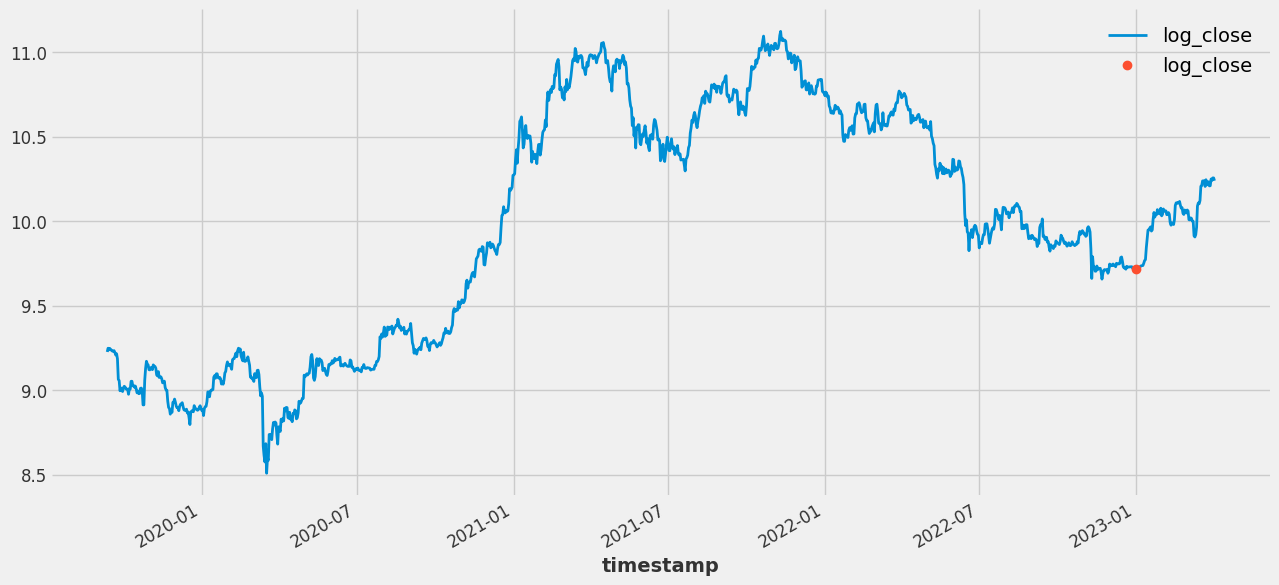

In [296]:
series[:1300].plot()
prediction.plot()

In [297]:
len(train)

1207

In [300]:
prediction = model.predict(len(val))

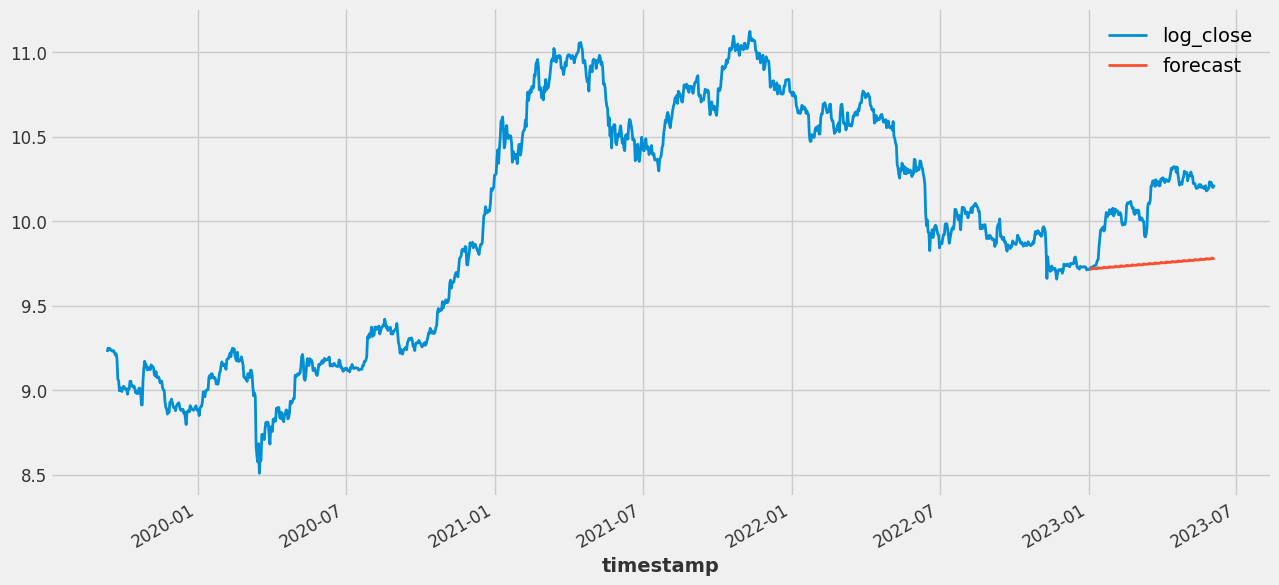

In [301]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [307]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [308]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

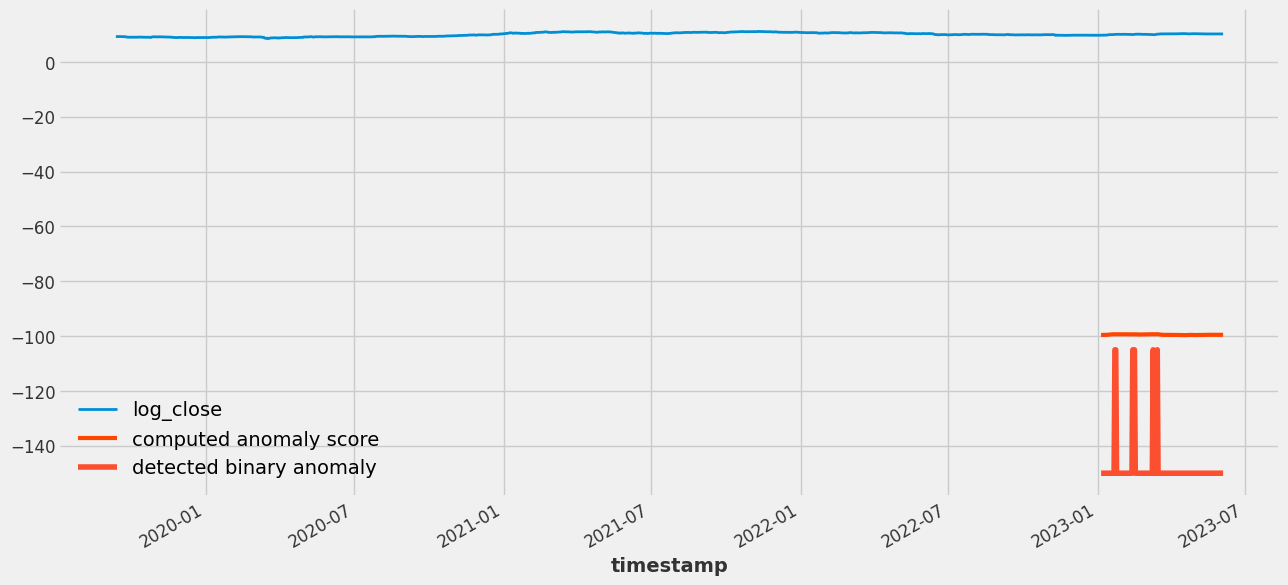

In [309]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [310]:
from darts.metrics import mape

In [311]:
score=mape(val,prediction)

In [312]:
score

3.584847899108532

In [313]:
from darts.metrics import mase

In [314]:
score1=mase(val,prediction,train)

In [315]:
score1

14.658365933924756

In [322]:
model = ExponentialSmoothing()

backtest = model.historical_forecasts(series,start=0.8, forecast_horizon=1)

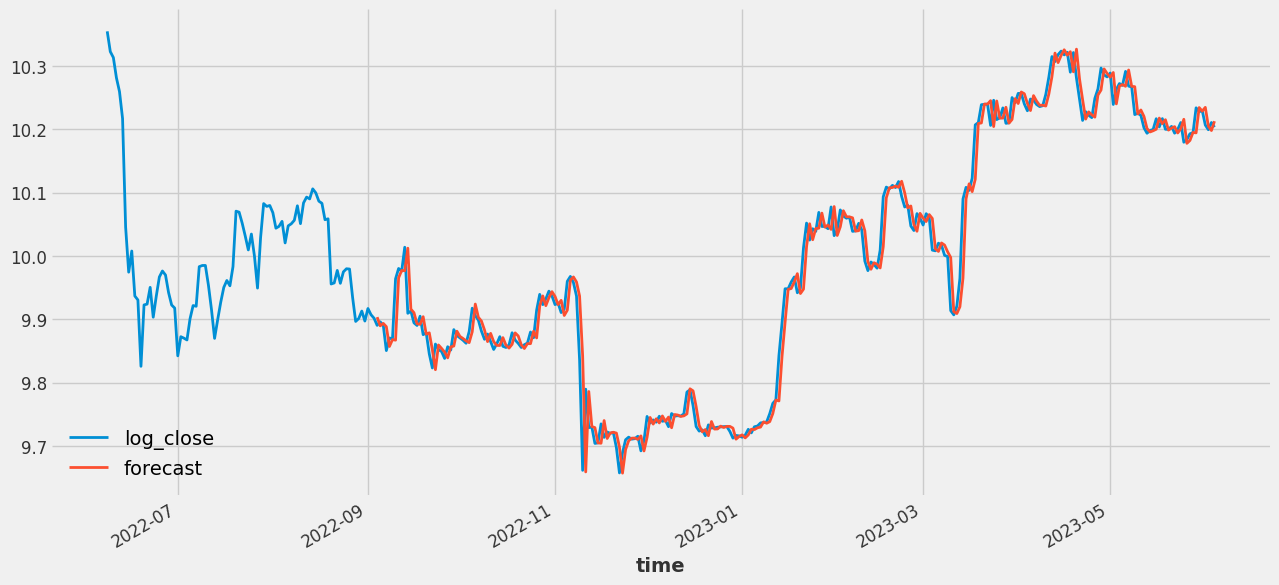

In [324]:
series[1000:].plot()
backtest.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

Choosing the model for forecasting

Gridsearch best model.best params

# ARIMA

In [77]:
from statsmodels.tsa.arima.model import ARIMA

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [79]:
data.set_index('timestamp',inplace=True)

In [80]:
data

,index,open,high,low,close,volume,CMF,FII,MFI,VWA,AOI,KAMA,PPO,PPO_signal,PVO,PVO_signal,ROC,rsi,stoch_RSI,StochOscillator,StochOscillator_signal,TSI,UltimateOscillator,WilliamsRIndicator,ATR,BOL_lband,BOL_hband,BOL_avg,KCW,KCP,KCM,DCL,DCH,DCM,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_14,EMA_20,EMA_50,EMA_100,EMA_200,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR,SMA_14,SMA_20,SMA_50,SMA_100,SMA_200,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,wma_9,wma_20,wma_50,wma_100,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-17 04:00:00,0,10216.35,10238.95,10194.39,10209.45,872.764,-0.120924,-913.266701,28.652105,10185.127432,-5.729912,10184.207475,-0.155468,-0.243303,1.037447,0.552894,0.598202,46.271721,0.676076,51.773363,58.093400,-10.639675,50.178602,-48.226637,52.300392,10073.766700,10358.878300,10216.3225,1.029615,0.418821,10217.990500,10080.7,10329.38,10205.040,1.452368,36.183688,30.858004,21.418009,60.0,-52.0,8.0,-3.877403,-79.6825,10216.809022,10223.590398,10253.805665,10258.150614,10223.457350,-10.009420,0.867360,-10.876780,-15.906877,-24.904204,26.531786,10100.005486,10181.362143,10216.3225,10269.6334,10292.0137,10247.86650,97.040222,-0.038235,-0.167639,1.075610,0.907971,10203.142000,10203.709333,10246.597545,10275.790895,3005.70,2.25,1.70,1,0.45992,0.46011,-1,48.386232,-1
2019-09-17 05:00:00,1,10208.81,10232.07,10204.53,10223.97,819.923,-0.114688,917.954536,36.501645,10187.270366,-12.684824,10186.551361,-0.137502,-0.222143,0.532956,0.548907,0.861528,48.644318,0.743204,57.612192,54.702161,-9.336736,54.098656,-42.387808,50.531792,10075.379977,10349.352023,10212.3660,1.031969,0.594886,10213.968500,10080.7,10329.38,10222.540,1.372308,34.888995,29.656738,20.584231,56.0,-52.0,4.0,6.904724,-92.2960,10217.763819,10223.626551,10252.635639,10257.473770,10223.462451,-9.424722,1.525039,-10.949762,-14.067871,-22.736938,26.587424,10104.592976,10186.853571,10212.3660,10267.6942,10290.3989,10248.98635,98.520111,-0.035367,0.026085,1.064804,1.090889,10208.823048,10204.437667,10244.806824,10274.443495,3005.70,2.25,1.70,-1,0.40934,0.45992,-1,42.873022,-1
2019-09-17 06:00:00,2,10224.11,10230.44,10187.88,10224.09,922.804,-0.112046,802.637671,36.306243,10191.939033,-26.571000,10188.754395,-0.121765,-0.202067,1.083131,0.655751,1.027859,48.664494,0.743775,57.660447,55.682001,-8.306903,51.810427,-42.339553,49.962379,10077.635517,10339.275483,10208.4555,1.049208,0.632549,10209.891000,10080.7,10329.38,10222.540,1.288889,33.967875,30.232613,19.331768,52.0,-44.0,8.0,5.018498,-64.1855,10218.607310,10223.670689,10251.516202,10256.812705,10223.468695,-8.210570,2.548815,-10.759384,-12.457165,-20.680983,26.638149,10109.088717,10192.235714,10208.4555,10265.5230,10288.4885,10248.40620,99.260055,-0.032511,0.148340,0.933562,1.081902,10213.787905,10205.554238,10243.096855,10273.130448,3005.70,2.25,1.70,-1,0.31251,0.40934,-1,42.291553,-1
2019-09-17 07:00:00,3,10225.02,10230.79,10192.69,10193.85,905.598,-0.124361,-3224.208213,35.631136,10195.919801,-33.398088,10188.963245,-0.131656,-0.187985,1.339276,0.792456,0.488749,43.975832,0.611118,45.500241,53.590960,-8.853256,45.944458,-54.499759,49.115066,10078.361917,10328.766083,10203.5640,1.059908,0.394859,10205.222667,10080.7,10329.38,10224.335,1.199061,33.103085,28.557447,18.311510,48.0,-44.0,4.0,0.707552,-58.8340,10215.306335,10220.830623,10249.254783,10255.565919,10223.173982,-7.215594,3.074639,-10.290233,-13.465561,-19.237899,26.537221,10113.494542,10196.322143,10203.5640,10262.9314,10286.5536,10247.61835,99.630028,-0.030300,0.189927,0.914300,1.104227,10214.003143,10204.163238,10240.286149,10271.256418,3005.70,2.25,1.70,-1,0.14629,0.31251,-1,41.595938,-1
2019-09-17 08:00:00,4,10193.21,10215.07,10165.00,10195.82,1089.829,-0.114965,-2456.898021,34.774165,10199.535893,-36.033412,10189.290069,-0.136376,-0.177663,3.169482,1.267861

In [81]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

Multiplicative Decomposition 

In [82]:
indexed_data=data[:1000]

In [83]:
indexed_data

,index,open,high,low,close,volume,CMF,FII,MFI,VWA,AOI,KAMA,PPO,PPO_signal,PVO,PVO_signal,ROC,rsi,stoch_RSI,StochOscillator,StochOscillator_signal,TSI,UltimateOscillator,WilliamsRIndicator,ATR,BOL_lband,BOL_hband,BOL_avg,KCW,KCP,KCM,DCL,DCH,DCM,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_14,EMA_20,EMA_50,EMA_100,EMA_200,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR,SMA_14,SMA_20,SMA_50,SMA_100,SMA_200,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,wma_9,wma_20,wma_50,wma_100,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-17 04:00:00,0,10216.35,10238.95,10194.39,10209.45,872.764,-0.120924,-913.266701,28.652105,10185.127432,-5.729912,10184.207475,-0.155468,-0.243303,1.037447,0.552894,0.598202,46.271721,0.676076,51.773363,58.093400,-10.639675,50.178602,-48.226637,52.300392,10073.766700,10358.878300,10216.3225,1.029615,0.418821,10217.990500,10080.70,10329.38,10205.040,1.452368,36.183688,30.858004,21.418009,60.0,-52.0,8.0,-3.877403,-79.6825,10216.809022,10223.590398,10253.805665,10258.150614,10223.457350,-10.009420,0.867360,-10.876780,-15.906877,-24.904204,26.531786,10100.005486,10181.362143,10216.3225,10269.6334,10292.0137,10247.86650,97.040222,-0.038235,-0.167639,1.075610,0.907971,10203.142000,10203.709333,10246.597545,10275.790895,3005.70,2.25,1.7,1,0.45992,0.46011,-1,48.386232,-1
2019-09-17 05:00:00,1,10208.81,10232.07,10204.53,10223.97,819.923,-0.114688,917.954536,36.501645,10187.270366,-12.684824,10186.551361,-0.137502,-0.222143,0.532956,0.548907,0.861528,48.644318,0.743204,57.612192,54.702161,-9.336736,54.098656,-42.387808,50.531792,10075.379977,10349.352023,10212.3660,1.031969,0.594886,10213.968500,10080.70,10329.38,10222.540,1.372308,34.888995,29.656738,20.584231,56.0,-52.0,4.0,6.904724,-92.2960,10217.763819,10223.626551,10252.635639,10257.473770,10223.462451,-9.424722,1.525039,-10.949762,-14.067871,-22.736938,26.587424,10104.592976,10186.853571,10212.3660,10267.6942,10290.3989,10248.98635,98.520111,-0.035367,0.026085,1.064804,1.090889,10208.823048,10204.437667,10244.806824,10274.443495,3005.70,2.25,1.7,-1,0.40934,0.45992,-1,42.873022,-1
2019-09-17 06:00:00,2,10224.11,10230.44,10187.88,10224.09,922.804,-0.112046,802.637671,36.306243,10191.939033,-26.571000,10188.754395,-0.121765,-0.202067,1.083131,0.655751,1.027859,48.664494,0.743775,57.660447,55.682001,-8.306903,51.810427,-42.339553,49.962379,10077.635517,10339.275483,10208.4555,1.049208,0.632549,10209.891000,10080.70,10329.38,10222.540,1.288889,33.967875,30.232613,19.331768,52.0,-44.0,8.0,5.018498,-64.1855,10218.607310,10223.670689,10251.516202,10256.812705,10223.468695,-8.210570,2.548815,-10.759384,-12.457165,-20.680983,26.638149,10109.088717,10192.235714,10208.4555,10265.5230,10288.4885,10248.40620,99.260055,-0.032511,0.148340,0.933562,1.081902,10213.787905,10205.554238,10243.096855,10273.130448,3005.70,2.25,1.7,-1,0.31251,0.40934,-1,42.291553,-1
2019-09-17 07:00:00,3,10225.02,10230.79,10192.69,10193.85,905.598,-0.124361,-3224.208213,35.631136,10195.919801,-33.398088,10188.963245,-0.131656,-0.187985,1.339276,0.792456,0.488749,43.975832,0.611118,45.500241,53.590960,-8.853256,45.944458,-54.499759,49.115066,10078.361917,10328.766083,10203.5640,1.059908,0.394859,10205.222667,10080.70,10329.38,10224.335,1.199061,33.103085,28.557447,18.311510,48.0,-44.0,4.0,0.707552,-58.8340,10215.306335,10220.830623,10249.254783,10255.565919,10223.173982,-7.215594,3.074639,-10.290233,-13.465561,-19.237899,26.537221,10113.494542,10196.322143,10203.5640,10262.9314,10286.5536,10247.61835,99.630028,-0.030300,0.189927,0.914300,1.104227,10214.003143,10204.163238,10240.286149,10271.256418,3005.70,2.25,1.7,-1,0.14629,0.31251,-1,41.595938,-1
2019-09-17 08:00:00,4,10193.21,10215.07,10165.00,10195.82,1089.829,-0.114965,-2456.898021,34.774165,10199.535893,-36.033412,10189.290069,-0.136376,-0.177663,3.169482,1.267861

In [84]:
result_mul = seasonal_decompose(data['close'], model='multiplicative',period=120)

In [85]:
pwd!

'/Users/IRIS/code/MehmetSever09/assist_trader/notebook'

In [86]:
#Removing seasons
data['deseasonalized'] = data.close.values/result_mul.seasonal

In [87]:
#plt.figure(figsize=(15,4)); plt.subplot(1,2,1); plt.plot(data.deseasonalized);
#plt.title('close price lin', fontsize=16);

In [88]:
#Removing trend
data['linearized'] = np.log(data['deseasonalized'])

In [89]:
#plt.subplot(1,2,2); plt.plot(data['linearized'])
#plt.title('close price lin', fontsize=16);

In [90]:
# 1st Differencing
y_diff = data['linearized'].diff().dropna()

# 2nd Differencing
y_diff_diff = data['linearized'].diff().diff().dropna()

In [91]:
print('p-value zero-diff: ', adfuller(data['linearized'])[1])
print('p-value first-diff: ', adfuller(data['linearized'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(data['linearized'].diff().diff().dropna())[1])

p-value zero-diff:  0.6267531727064843
p-value first-diff:  0.0
p-value second-diff:  0.0


In [92]:
from pmdarima.arima.utils import ndiffs
ndiffs(data['linearized'])

1

In [93]:
arima = ARIMA(data['linearized'], order=(2, 1, 1), trend='t')
arima = arima.fit()

In [94]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             linearized   No. Observations:                32541
Model:                 ARIMA(2, 1, 1)   Log Likelihood              112240.363
Date:                Fri, 09 Jun 2023   AIC                        -224470.727
Time:                        12:03:41   BIC                        -224428.776
Sample:                    09-17-2019   HQIC                       -224457.318
                         - 06-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.941e-05   4.24e-05      0.694      0.488   -5.37e-05       0.000
ar.L1         -0.1600      0.089     -1.804      0.071      -0.334       0.014
ar.L2         -0.0215      0.002    -10.254      0.000      -0.026      -0.017
ma.L1          0.1452      0.088      1.648      0.099      -0.027       0.318
sigma2      5.908e-05   8.94e-08    661.208      0.000    5.89e-05    5.93e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           3890227.92
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        56.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

parameters

In [232]:
smodel = pm.auto_arima(df['linearized'],
                       start_p=1, max_p=2,
                       start_q=1, max_q=2,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-224465.718, Time=15.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-224456.616, Time=9.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-224461.505, Time=8.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-224461.777, Time=10.84 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-224456.616, Time=5.95 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-224470.286, Time=16.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-224471.737, Time=16.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-224471.737, Time=16.69 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 98.934 seconds


In [95]:
aarima_model = AutoARIMA(
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    m=1,
    d=1,
    seasonal=False,
    start_P=0,
    D=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True, stepwise=True
)

aarima_model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=401612.597, Time=8.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=401618.913, Time=0.98 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=401620.558, Time=1.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=401620.545, Time=2.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=401616.935, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=401606.860, Time=12.98 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=401613.541, Time=2.01 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=401608.002, Time=16.94 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=401608.890, Time=12.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401606.995, Time=13.67 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=401614.257, Time=2.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=401610.835, Time=20.22 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=401604.879, Time=5.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=401610.615, Time=4.08 sec


AutoARIMA(add_encoders=None, start_p=1, start_q=1, max_p=5, max_q=5, m=1, d=1, seasonal=False, start_P=0, D=None, trace=True, error_action=ignore, suppress_warnings=True, stepwise=True)

In [96]:
aarima_model.model_params

OrderedDict([('add_encoders', None),
             ('start_p', 1),
             ('start_q', 1),
             ('max_p', 5),
             ('max_q', 5),
             ('m', 1),
             ('d', 1),
             ('seasonal', False),
             ('start_P', 0),
             ('D', None),
             ('trace', True),
             ('error_action', 'ignore'),
             ('suppress_warnings', True),
             ('stepwise', True)])

In [101]:
data['linearized']

timestamp
2019-09-17 04:00:00     9.230586
2019-09-17 05:00:00     9.232444
2019-09-17 06:00:00     9.232652
2019-09-17 07:00:00     9.230544
2019-09-17 08:00:00     9.230284
                         ...    
2023-06-03 20:00:00    10.208560
2023-06-03 21:00:00    10.208577
2023-06-03 22:00:00    10.206077
2023-06-03 23:00:00    10.204090
2023-06-04 00:00:00    10.200913
Name: linearized, Length: 32541, dtype: float64

In [152]:
prediction = aarima_model.predict(len(val))

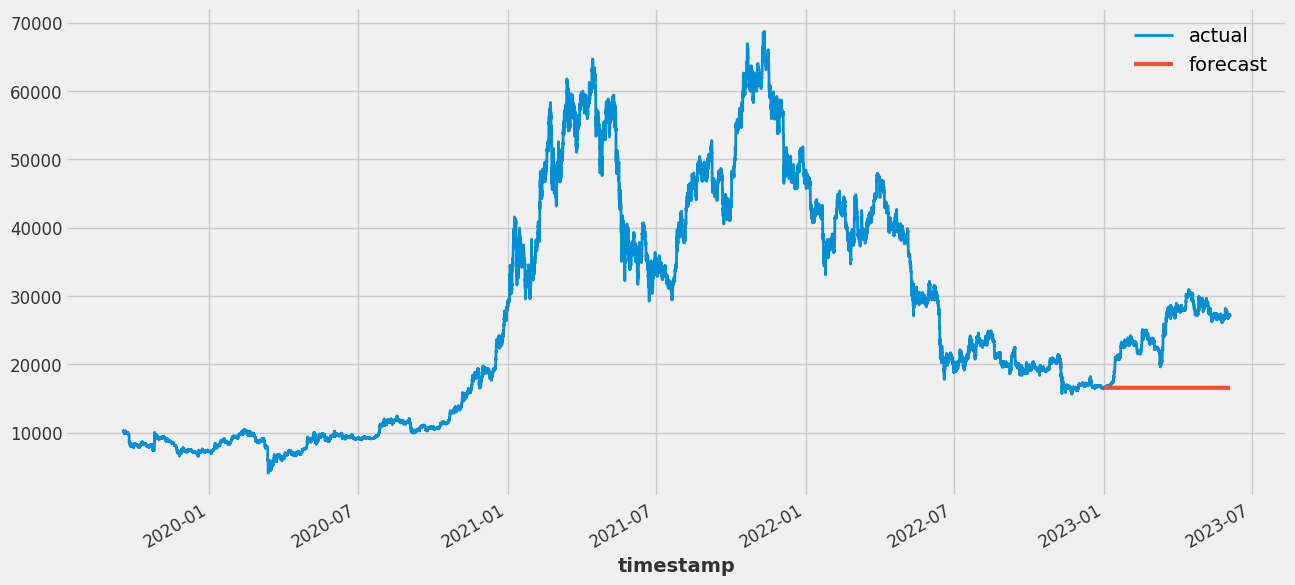

In [103]:
import matplotlib.pyplot as plt

series.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()

In [119]:
train = data['linearized'][0:25000]
val = data['linearized'][25000:]

# Building model
arima = ARIMA(train, order=(2, 1, 1), trend='t')  
arima = arima.fit()


forecast = arima.forecast(len(val), alpha=0.05)  # 95% confidence


forecast_results = arima.get_forecast(len(val), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

In [120]:
#recomposition back to timeseries
forecast_recons = np.exp(forecast) * result_mul.seasonal[25000:]
train_recons = np.exp(train) * result_mul.seasonal[0:25000]
val_recons = np.exp(val) * result_mul.seasonal[25000:]
lower_recons = np.exp(confidence_int)[:, 0] * result_mul.seasonal[25000:]
upper_recons = np.exp(confidence_int)[:, 1] * result_mul.seasonal[25000:]

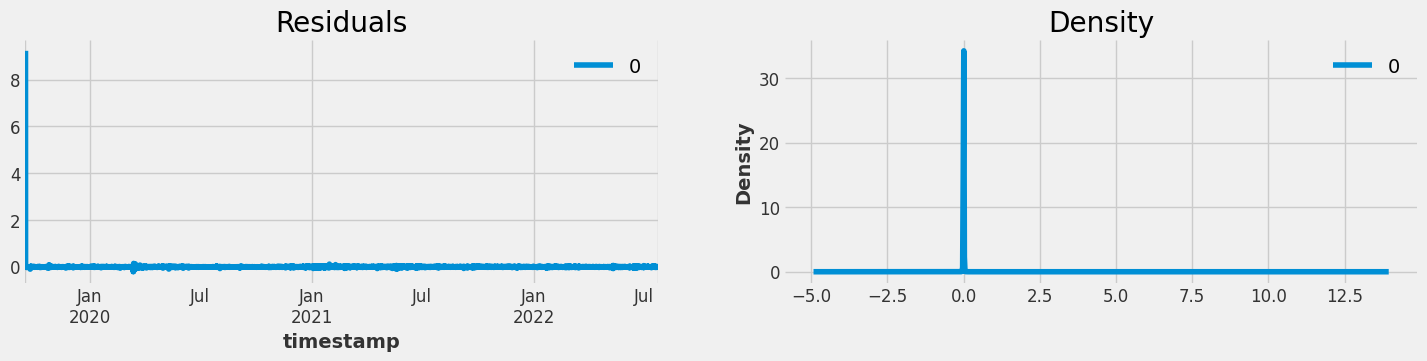

In [121]:
residuals = pd.DataFrame(arima.resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1]);

In [233]:
best_order = smodel.order

In [317]:
print(np.exp(ARIMA(log_close,order=best_order).fit().get_forecast(1).predicted_mean))

NameError: name 'log_close' is not defined

# SARIMA

Train split

In [105]:
data['log'] = np.log(data.close)

In [106]:
train = data.log[0:25000]
val = data.log[25000:]

In [107]:
smodel = pm.auto_arima(train, seasonal=True, m=12, 
                       start_p=0, max_p=1, max_d=1, start_q=0, max_q=1,
                       start_P=0, max_P=2, max_D=1, start_Q=0, max_Q=2, 
                       trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-168751.446, Time=4.85 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-168763.109, Time=41.87 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-168764.089, Time=17.55 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-168753.073, Time=1.44 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-168756.160, Time=3.42 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-168784.304, Time=43.28 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-168763.391, Time=14.56 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-168790.315, Time=89.58 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-168793.918, Time=83.29 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-168787.791, Time=63.35 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-168797.221, Time=50.44 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-168766.579, Time=24.09 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-168793.650, Time=121.99 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept  

In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(2, 0, 0, 12))
sarima = sarima.fit(maxiter=75)

results = sarima.get_forecast(len(val), alpha=0.05)
forecast = results.predicted_mean
confidence_int = results.conf_int()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.37618D+00    |proj g|=  3.81446D-01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     21      1     0     0   1.273D-01  -3.376D+00
  F =  -3.3761767334835633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [114]:
forecast_recons = pd.Series(np.exp(forecast), index=val.index)
lower_recons = np.exp(confidence_int['lower log']).values
upper_recons = np.exp(confidence_int['upper log']).values

In [115]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 log   No. Observations:                25000
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 12)   Log Likelihood               84404.418
Date:                             Fri, 09 Jun 2023   AIC                        -168798.837
Time:                                     12:27:19   BIC                        -168758.204
Sample:                                 09-17-2019   HQIC                       -168785.685
                                      - 07-24-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3531      0.104      3.395      0.001       0.149       0.557
ma.L1         -0.3694      0.103     -3.588      0.000      -0.571      -0.168
ar.S.L12       0.0194      0.003      5.572      0.000       0.013       0.026
ar.S.L24      -0.0356      0.005     -7.790      0.000      -0.045      -0.027
sigma2      6.836e-05   1.19e-07    572.326      0.000    6.81e-05    6.86e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):           2750648.08
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        54.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# PROPHET

In [123]:
df = data.reset_index().rename(columns={'timestamp': 'ds', 'close':'y'})
df.head()

,ds,index,open,high,low,y,volume,CMF,FII,MFI,VWA,AOI,KAMA,PPO,PPO_signal,PVO,PVO_signal,ROC,rsi,stoch_RSI,StochOscillator,StochOscillator_signal,TSI,UltimateOscillator,WilliamsRIndicator,ATR,BOL_lband,BOL_hband,BOL_avg,KCW,KCP,KCM,DCL,DCH,DCM,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_14,EMA_20,EMA_50,EMA_100,EMA_200,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR,SMA_14,SMA_20,SMA_50,SMA_100,SMA_200,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,wma_9,wma_20,wma_50,wma_100,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity,deseasonalized,linearized,log
0,2019-09-17 04:00:00,0,10216.35,10238.95,10194.39,10209.45,872.764,-0.120924,-913.266701,28.652105,10185.127432,-5.729912,10184.207475,-0.155468,-0.243303,1.037447,0.552894,0.598202,46.271721,0.676076,51.773363,58.093400,-10.639675,50.178602,-48.226637,52.300392,10073.766700,10358.878300,10216.3225,1.029615,0.418821,10217.990500,10080.7,10329.38,10205.040,1.452368,36.183688,30.858004,21.418009,60.0,-52.0,8.0,-3.877403,-79.6825,10216.809022,10223.590398,10253.805665,10258.150614,10223.457350,-10.009420,0.867360,-10.876780,-15.906877,-24.904204,26.531786,10100.005486,10181.362143,10216.3225,10269.6334,10292.0137,10247.86650,97.040222,-0.038235,-0.167639,1.075610,0.907971,10203.142000,10203.709333,10246.597545,10275.790895,3005.7,2.25,1.7,1,0.45992,0.46011,-1,48.386232,-1,10204.520450,9.230586,9.231069
1,2019-09-17 05:00:00,1,10208.81,10232.07,10204.53,10223.97,819.923,-0.114688,917.954536,36.501645,10187.270366,-12.684824,10186.551361,-0.137502,-0.222143,0.532956,0.548907,0.861528,48.644318,0.743204,57.612192,54.702161,-9.336736,54.098656,-42.387808,50.531792,10075.379977,10349.352023,10212.3660,1.031969,0.594886,10213.968500,10080.7,10329.38,10222.540,1.372308,34.888995,29.656738,20.584231,56.0,-52.0,4.0,6.904724,-92.2960,10217.763819,10223.626551,10252.635639,10257.473770,10223.462451,-9.424722,1.525039,-10.949762,-14.067871,-22.736938,26.587424,10104.592976,10186.853571,10212.3660,10267.6942,10290.3989,10248.98635,98.520111,-0.035367,0.026085,1.064804,1.090889,10208.823048,10204.437667,10244.806824,10274.443495,3005.7,2.25,1.7,-1,0.40934,0.45992,-1,42.873022,-1,10223.496104,9.232444,9.232490
2,2019-09-17 06:00:00,2,10224.11,10230.44,10187.88,10224.09,922.804,-0.112046,802.637671,36.306243,10191.939033,-26.571000,10188.754395,-0.121765,-0.202067,1.083131,0.655751,1.027859,48.664494,0.743775,57.660447,55.682001,-8.306903,51.810427,-42.339553,49.962379,10077.635517,10339.275483,10208.4555,1.049208,0.632549,10209.891000,10080.7,10329.38,10222.540,1.288889,33.967875,30.232613,19.331768,52.0,-44.0,8.0,5.018498,-64.1855,10218.607310,10223.670689,10251.516202,10256.812705,10223.468695,-8.210570,2.548815,-10.759384,-12.457165,-20.680983,26.638149,10109.088717,10192.235714,10208.4555,10265.5230,10288.4885,10248.40620,99.260055,-0.032511,0.148340,0.933562,1.081902,10213.787905,10205.554238,10243.096855,10273.130448,3005.7,2.25,1.7,-1,0.31251,0.40934,-1,42.291553,-1,10225.623332,9.232652,9.232502
3,2019-09-17 07:00:00,3,10225.02,10230.79,10192.69,10193.85,905.598,-0.124361,-3224.208213,35.631136,10195.919801,-33.398088,10188.963245,-0.131656,-0.187985,1.339276,0.792456,0.488749,43.975832,0.611118,45.500241,53.590960,-8.853256,45.944458,-54.499759,49.115066,10078.361917,10328.766083,10203.5640,1.059908,0.394859,10205.222667,10080.7,10329.38,10224.335,1.199061,33.103085,28.557447,18.311510,48.0,-44.0,4.0,0.707552,-58.8340,10215.306335,10220.830623,10249.254783,10255.565919,10223.173982,-7.215594,3.074639,-10.290233,-13.465561,-19.237899,26.537221,10113.494542,10196.322143,10203.5640,10262.9314,10286.5536,10247.61835,99.630028,-0.030300,0.189927,0.914300,1.104227,10214.003143,10204.163238,10240.286149,10271.256418,3005.7,2.25,1.7,-1,0.14629,0.31251,-1,41.595938,-1,10204.089412,9.230544,9.229540
4,2019-09-17 08:00:00,4,10193.21,10215.07,10165.00,10195.82,1089.829,-0.114965,-2456.898021,34.774165,10199.5

In [124]:
from prophet import Prophet

train = df.iloc[:28000]
val = df.iloc[28000:]

model = Prophet(seasonality_mode='multiplicative')

model.fit(train)

12:30:19 - cmdstanpy - INFO - Chain [1] start processing
12:31:13 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
forecast_val = model.predict(val)
forecast_val.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-11-26 20:00:00,14733.301473,13472.616270,18122.878384,14733.301473,14733.301473,0.000017,0.000017,0.000017,0.070973,0.070973,0.070973,-0.000230,-0.000230,-0.000230,0.071187,0.071187,0.071187,0.0,0.0,0.0,15778.968727
1,2022-11-26 21:00:00,14729.639622,13329.907266,18212.280426,14729.639622,14729.639622,-0.000004,-0.000004,-0.000004,0.070487,0.070487,0.070487,-0.000352,-0.000352,-0.000352,0.070843,0.070843,0.070843,0.0,0.0,0.0,15767.887733
2,2022-11-26 22:00:00,14725.977771,13318.800745,18184.269762,14725.977771,14725.977771,0.000002,0.000002,0.000002,0.070016,0.070016,0.070016,-0.000483,-0.000483,-0.000483,0.070497,0.070497,0.070497,0.0,0.0,0.0,15757.037814
3,2022-11-26 23:00:00,14722.315920,13440.260127,17924.568451,14722.315920,14722.315920,0.000032,0.000032,0.000032,0.069561,0.069561,0.069561,-0.000621,-0.000621,-0.000621,0.070151,0.070151,0.070151,0.0,0.0,0.0,15746.420309
4,2022-11-27 00:00:00,14718.654069,13415.054174,18179.271931,14718.654069,14718.654069,0.000134,0.000134,0.000134,0.069172,0.069172,0.069172,-0.000765,-0.000765,-0.000765,0.069803,0.069803,0.069803,0.0,0.0,0.0,15736.768641


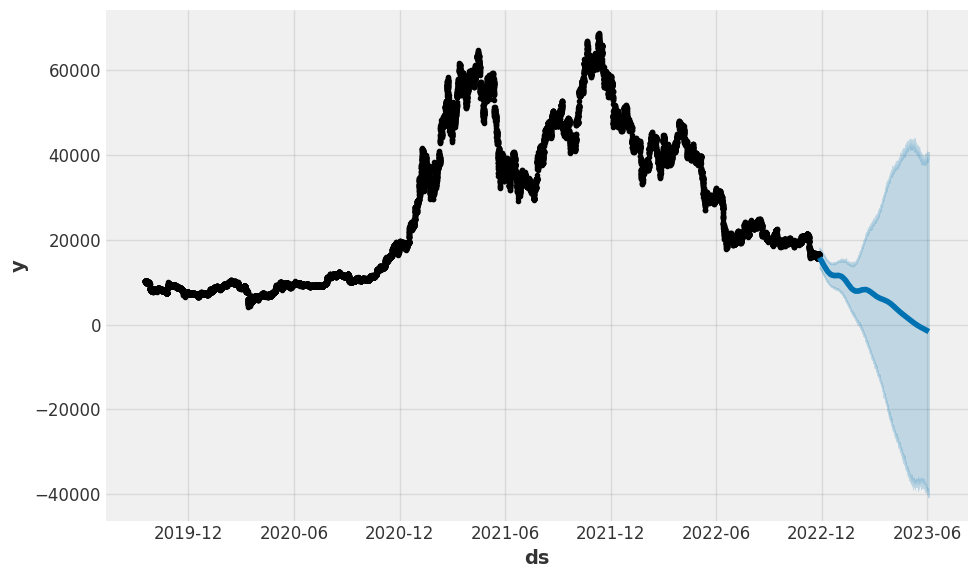

In [127]:
model.plot(forecast_val);

In [129]:
# Predict the next 50 datapoints
future = model.make_future_dataframe(periods=50, freq='1h')
forecast_future = model.predict(future)
forecast_future.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-09-17 04:00:00,10580.850033,7005.780324,11707.588626,10580.850033,10580.850033,0.000324,0.000324,0.000324,-0.104326,-0.104326,-0.104326,0.000806,0.000806,0.000806,-0.105455,-0.105455,-0.105455,0.0,0.0,0.0,9476.994297
1,2019-09-17 05:00:00,10577.279383,7123.418368,11987.078614,10577.279383,10577.279383,-0.000149,-0.000149,-0.000149,-0.105123,-0.105123,-0.105123,0.000702,0.000702,0.000702,-0.105675,-0.105675,-0.105675,0.0,0.0,0.0,9465.367932
2,2019-09-17 06:00:00,10573.708734,6905.569545,11776.799834,10573.708734,10573.708734,-0.000620,-0.000620,-0.000620,-0.105922,-0.105922,-0.105922,0.000593,0.000593,0.000593,-0.105894,-0.105894,-0.105894,0.0,0.0,0.0,9453.724548
3,2019-09-17 07:00:00,10570.138085,7056.116988,11629.299223,10570.138085,10570.138085,-0.000844,-0.000844,-0.000844,-0.106476,-0.106476,-0.106476,0.000480,0.000480,0.000480,-0.106113,-0.106113,-0.106113,0.0,0.0,0.0,9444.674030
4,2019-09-17 08:00:00,10566.567436,7260.218052,11843.036265,10566.567436,10566.567436,-0.000742,-0.000742,-0.000742,-0.106704,-0.106704,-0.106704,0.000368,0.000368,0.000368,-0.106330,-0.106330,-0.106330,0.0,0.0,0.0,9439.072064


In [130]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

initial = f'{5 * 365} days' 
period = f'{5 * 365} days'
horizon = '365 days'
df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon)

ValueError: Less data than horizon after initial window. Make horizon or initial shorter.